# Iterative DTW

Cherchons à appliquer la DTW sur une variable puis d'apppliquer le vecteur de transformation à la variable suivante pour converger vers un vecteur de transformation final.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean, cdist
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
from sklearn.preprocessing import MinMaxScaler

numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject


In [3]:
P8_df = pd.read_csv('/home/baptiste/Desktop/Emploi/Formation/WildCodeSchool/Side_project/Data/P8.csv', 
                 sep = ';', na_values = 'n.a.')
P10_df = pd.read_csv('/home/baptiste/Desktop/Emploi/Formation/WildCodeSchool/Side_project/Data/P10.csv', 
                  sep = ';', na_values = 'n.a.')

In [4]:
P8_df = P8_df.fillna(method = 'ffill')
P10_df = P10_df.fillna(method = 'ffill')

## Scaling 

On met chaque variable entre 0 et 1 afin d'améliorer les analyses

In [5]:
scaler = MinMaxScaler()

P8_df = pd.DataFrame(scaler.fit_transform(P8_df),
                     index = P8_df.index,
                     columns = P8_df.columns)

P10_df = pd.DataFrame(scaler.fit_transform(P10_df),
                      index = P10_df.index,
                      columns = P10_df.columns)

## DTW

In [6]:
def transformer(tple):
    '''
    INPUTS
    ------
        - tple : list
            List of tuples of the transformation vector to apply.
            
    OUTPUT
    ------
        - transform_list : list
            Vector of the X2 positions to apply to X1 data.
    '''
    import operator
    from itertools import groupby
    
    transform_list = []
    for k, g in groupby(tple, operator.itemgetter(0)):
        x = list(g)
        bst_val = []
        for i in x:
            val = i[1]
            pval = P10[val]
            bst_val.append(pval)
        
        pos = np.argmin(abs(np.array(bst_val) - np.mean(bst_val)))
        bst_pos = x[pos][1]
        transform_list.append(bst_pos)

    return transform_list

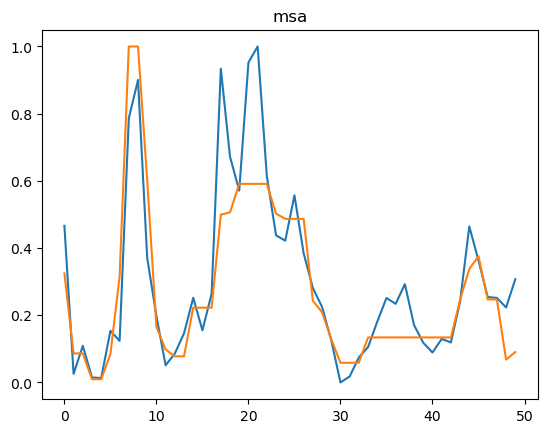

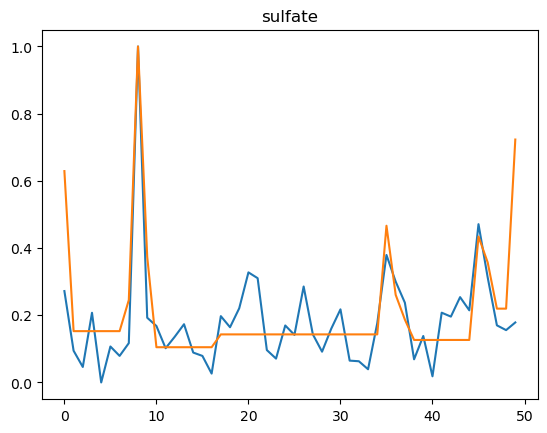

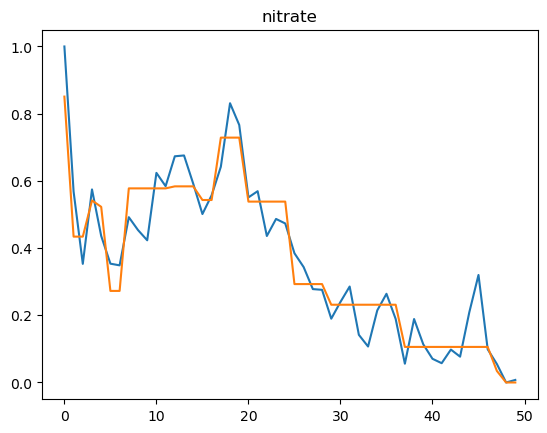

In [7]:
cols = ['msa', 'sulfate', 'nitrate']
transform_vector = []

for i in range(len(cols)) :
    col = cols[i]
    
    P8 = np.array(P8_df[col],  dtype = np.double)
    P10 = np.array(P10_df[col], dtype = np.double)
    
    if bool(transform_vector) == True :
        P10 = P10[transform_vector]
    
    tuple_transform = dtw.warping_path(P8, P10)
    transform_vector = transformer(tuple_transform)

    plt.plot(P8)
    plt.plot(P10[transform_vector])
    plt.title(col)
    plt.show()


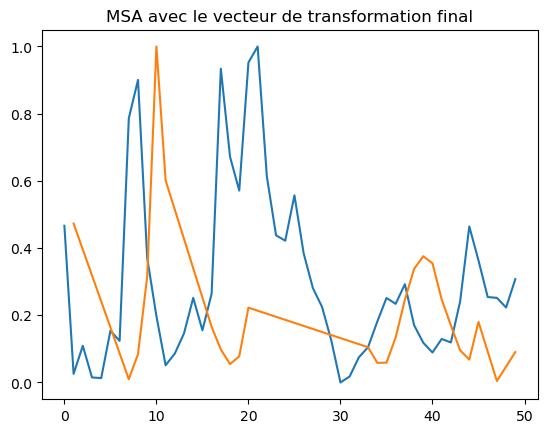

In [9]:
plt.plot(P8_df['msa'])
plt.plot(P10_df['msa'][transform_vector])
plt.title('MSA avec le vecteur de transformation final')
plt.show()